# EBUSS SENTIMENT BASED PRODUCT RECOMMENDATION SYSTEM

Ebuss has captured a huge market share in many fields, and it sells the products in various categories such as household essentials, books, personal care products, medicines, cosmetic items, beauty products, electrical appliances, kitchen and dining products and health care products.

 

With the advancement in technology, it is imperative for Ebuss to grow quickly in the e-commerce market to become a major leader in the market because it has to compete with the likes of Amazon, Flipkart, etc., which are already market leaders.

 

As a senior ML Engineer, you are asked to build a model that will improve the recommendations given to the users given their past reviews and ratings. 

 

In order to do this, you planned to build a sentiment-based product recommendation system, which includes the following tasks.
- Data sourcing and sentiment analysis
- Building a recommendation system
- Improving the recommendations using the sentiment analysis model
- Deploying the end-to-end project with a user interface

# Data sourcing and sentiment analysis

In this task, you have to analyse product reviews after some text preprocessing steps and build an ML model to get the sentiments corresponding to the users' reviews and ratings for multiple products. 
<b>Product Reviews Dataset</b> : This dataset consists of 30,000 reviews for more than 200 different products. The reviews and ratings are given by more than 20,000 users.
The steps to be performed for the first task are given below.

## Exploratory data analysis
- Data cleaning
- Text preprocessing
- Feature extraction: In order to extract features from the text data, you may choose from any of the methods, including bag-of-words, TF-IDF vectorization or word embedding.
- Training a text classification model: You need to build at least three ML models. You then need to analyse the performance of each of these models and choose the best model. At least three out of the following four models need to be built (Do not forget, if required, handle the class imbalance and perform hyperparameter tuning.). 
    -   Logistic regression
    -   Random forest
    -   XGBoost
    -   Naive Bayes

Out of these four models, you need to select one classification model based on its performance.

## Importing the libraries


In [1]:
# Importing the required libraries
!pip install wordcloud
!pip install imblearn

import pandas as pd
import numpy as np
from numpy import *
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re

import random
import pickle
import pylab

import time
from wordcloud import WordCloud
from collections import Counter

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import RandomizedSearchCV

from imblearn.over_sampling import SMOTE
from collections import Counter

from sklearn.metrics import f1_score, classification_report,precision_score,recall_score,confusion_matrix, roc_auc_score, roc_curve

from sklearn.metrics.pairwise import pairwise_distances

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\singh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
# Reading the dataset
header_list = ['id','brand','categories','manufacturer','name',
'reviews_date', 'reviews_didPurchase','reviews_doRecommend','reviews_rating','reviews_text','reviews_title','reviews_userCity',
'reviews_userProvince','reviews_username','user_sentiment']

ebuss_dataset = pd.read_csv('sample30.csv',sep=",")
ebuss_dataset.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_didPurchase,reviews_doRecommend,reviews_rating,reviews_text,reviews_title,reviews_userCity,reviews_userProvince,reviews_username,user_sentiment
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,NaN,5,i love this album. it's very good. more to the...,Just Awesome,Los Angeles,NaN,joshua,Positive
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor. This review was collected as part...,Good,NaN,NaN,dorothy w,Positive
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,True,NaN,5,Good flavor.,Good,NaN,NaN,dorothy w,Positive
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,False,1,I read through the reviews on here before look...,Disappointed,NaN,NaN,rebecca,Negative
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,False,1,My husband bought this gel for us. The gel cau...,Irritation,NaN,NaN,walker557,Negative


## Data Analysis

In [3]:
ebuss_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    30000 non-null  object
 1   brand                 30000 non-null  object
 2   categories            30000 non-null  object
 3   manufacturer          29859 non-null  object
 4   name                  30000 non-null  object
 5   reviews_date          29954 non-null  object
 6   reviews_didPurchase   15932 non-null  object
 7   reviews_doRecommend   27430 non-null  object
 8   reviews_rating        30000 non-null  int64 
 9   reviews_text          30000 non-null  object
 10  reviews_title         29810 non-null  object
 11  reviews_userCity      1929 non-null   object
 12  reviews_userProvince  170 non-null    object
 13  reviews_username      29937 non-null  object
 14  user_sentiment        29999 non-null  object
dtypes: int64(1), object(14)
memory usage

In [4]:
# Count of empty values in all the columns
print("Missing Value Count :")
print(ebuss_dataset.isnull().sum())

Missing Value Count :
id                          0
brand                       0
categories                  0
manufacturer              141
name                        0
reviews_date               46
reviews_didPurchase     14068
reviews_doRecommend      2570
reviews_rating              0
reviews_text                0
reviews_title             190
reviews_userCity        28071
reviews_userProvince    29830
reviews_username           63
user_sentiment              1
dtype: int64


In [5]:
'''
Determines the number of missing values in each of the variable of dataset and returns ONLY the variables with atleast one missing value.
'''
def computeMissingValueProportions(df):
    result = round(df.isna().sum() / df.shape[0] *100, 5)
    return result[result.values > 0].sort_values(ascending = False).round(4)

In [6]:
# Percentage of empty values in all the columns
print("Missing Values :")
ebuss_dataset_info = computeMissingValueProportions(ebuss_dataset)
ebuss_dataset_info

Missing Values :


reviews_userProvince    99.4333
reviews_userCity        93.5700
reviews_didPurchase     46.8933
reviews_doRecommend      8.5667
reviews_title            0.6333
manufacturer             0.4700
reviews_username         0.2100
reviews_date             0.1533
user_sentiment           0.0033
dtype: float64

## Data Cleaning


Data cleaning is one of the most important steps in a data analysis proccess. Without cleaning, data can lead to errorneous results.

### 1. Missing Value Treatment

In [7]:
# Computing missing values in percentage for all the columns
ebuss_dataset_info = computeMissingValueProportions(ebuss_dataset)
ebuss_dataset_info

reviews_userProvince    99.4333
reviews_userCity        93.5700
reviews_didPurchase     46.8933
reviews_doRecommend      8.5667
reviews_title            0.6333
manufacturer             0.4700
reviews_username         0.2100
reviews_date             0.1533
user_sentiment           0.0033
dtype: float64

 So we see the values in these columns are null values. Infact we cannot work with variables with more than 80% of missing data. Hence, we need to drop such columns with more than 80% of the rows being empty.

In [8]:
 #Getting column which have more than 80% of data as missing
cols = ebuss_dataset_info[ebuss_dataset_info >=80]
print("Columns with more than 80% data missing")
cols

Columns with more than 80% data missing


reviews_userProvince    99.4333
reviews_userCity        93.5700
dtype: float64

In [9]:
#Dropping the columns with more than 80% missing data 
ebuss_dataset.drop(axis=1, labels=cols.index, inplace=True)

 Now let's examine the data further to see how many values are missing in each variable

In [10]:
# Computing missing values in percentage for all the columns
ebuss_dataset_info = computeMissingValueProportions(ebuss_dataset)
ebuss_dataset_info

reviews_didPurchase    46.8933
reviews_doRecommend     8.5667
reviews_title           0.6333
manufacturer            0.4700
reviews_username        0.2100
reviews_date            0.1533
user_sentiment          0.0033
dtype: float64

In [11]:
ebuss_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         29859 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         29954 non-null  object
 6   reviews_didPurchase  15932 non-null  object
 7   reviews_doRecommend  27430 non-null  object
 8   reviews_rating       30000 non-null  int64 
 9   reviews_text         30000 non-null  object
 10  reviews_title        29810 non-null  object
 11  reviews_username     29937 non-null  object
 12  user_sentiment       29999 non-null  object
dtypes: int64(1), object(12)
memory usage: 3.0+ MB


One reviews column can be created with the help of reviews_text and reviews_title.
- 0.63% of reviews_title is having null value, so let's first replace null values as empty strings.
- Let's create one single reviews column with the help of the reviews_text and reviews_title.
- Drop the duplicate columns 

In [12]:
# Replacing null values with empty string
ebuss_dataset['reviews_title'] = ebuss_dataset['reviews_title'].fillna('')

# Creating reviews column
ebuss_dataset['reviews'] = ebuss_dataset['reviews_title']  + ebuss_dataset['reviews_text']

# Dropping unnecessary columns
ebuss_dataset.drop(['reviews_title','reviews_text'],axis=1,inplace=True)


In [13]:
ebuss_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   30000 non-null  object
 1   brand                30000 non-null  object
 2   categories           30000 non-null  object
 3   manufacturer         29859 non-null  object
 4   name                 30000 non-null  object
 5   reviews_date         29954 non-null  object
 6   reviews_didPurchase  15932 non-null  object
 7   reviews_doRecommend  27430 non-null  object
 8   reviews_rating       30000 non-null  int64 
 9   reviews_username     29937 non-null  object
 10  user_sentiment       29999 non-null  object
 11  reviews              30000 non-null  object
dtypes: int64(1), object(11)
memory usage: 2.7+ MB


In [14]:
ebuss_dataset_info = computeMissingValueProportions(ebuss_dataset)
ebuss_dataset_info 

reviews_didPurchase    46.8933
reviews_doRecommend     8.5667
manufacturer            0.4700
reviews_username        0.2100
reviews_date            0.1533
user_sentiment          0.0033
dtype: float64

User sentiment column is having only 1 value missing. We can replace it with the Negative value.

In [15]:
ebuss_dataset['user_sentiment']= ebuss_dataset['user_sentiment'].fillna('Negative')
ebuss_dataset['user_sentiment'].value_counts()

Positive    26632
Negative     3368
Name: user_sentiment, dtype: int64

user_sentiment contains 2 values only: Positive and Negative.
Let's convert it to numeric, here Positive means 1 and Negative means 0

In [16]:
ebuss_dataset['user_sentiment'] = ebuss_dataset['user_sentiment'].apply(lambda x:1 if x=='Positive' else 0)
ebuss_dataset['user_sentiment'].value_counts()

1    26632
0     3368
Name: user_sentiment, dtype: int64

In [17]:
ebuss_dataset_info = computeMissingValueProportions(ebuss_dataset)
ebuss_dataset_info 

reviews_didPurchase    46.8933
reviews_doRecommend     8.5667
manufacturer            0.4700
reviews_username        0.2100
reviews_date            0.1533
dtype: float64

Let's analyse reviews_didPurchase column as it's having almost 47% of the data missing

In [18]:
#on the reviews_didpurchase column, replace null values with "Null"
ebuss_dataset['reviews_didPurchase'].fillna('Null', inplace=True)

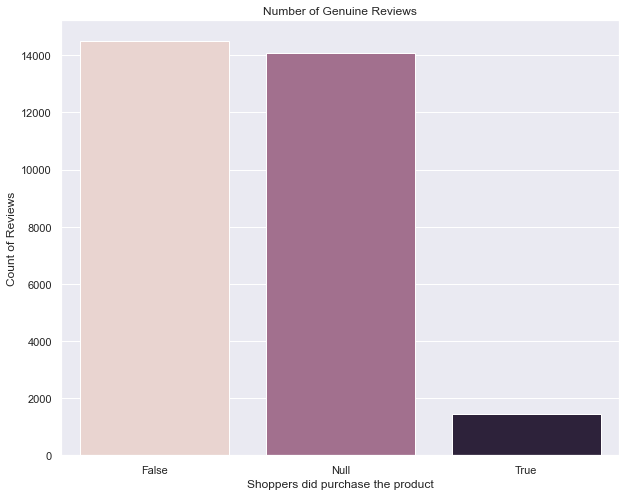

In [19]:
# Let's plot a distribution to understand reviews_didPurchase better

plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")

# Calculating shopers who actually purchased and reviewed
counts = ebuss_dataset['reviews_didPurchase'].value_counts()
# Plotting the Chart
axes = sns.barplot(x=counts.index, y=counts, palette='ch:0');
# Setting Axes labels and title of the chart
axes.set(xlabel='Shoppers did purchase the product',ylabel='Count of Reviews', title='Number of Genuine Reviews');

plt.show()

Shoppers who did purchase the product and provided the reveiw is just too low about 4% in the dataset. With such low data this column is not required for the analysis

In [20]:
ebuss_dataset.drop('reviews_didPurchase',axis=1,inplace=True)
ebuss_dataset.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_doRecommend,reviews_rating,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,NaN,5,joshua,1,Just Awesomei love this album. it's very good....
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,dorothy w,1,GoodGood flavor. This review was collected as ...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,NaN,5,dorothy w,1,GoodGood flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,False,1,rebecca,0,DisappointedI read through the reviews on here...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,False,1,walker557,0,IrritationMy husband bought this gel for us. T...


In [21]:
ebuss_dataset_info = computeMissingValueProportions(ebuss_dataset)
ebuss_dataset_info 

reviews_doRecommend    8.5667
manufacturer           0.4700
reviews_username       0.2100
reviews_date           0.1533
dtype: float64

Let's analyse reviews_doRecommend column which has 8.5% of missing data

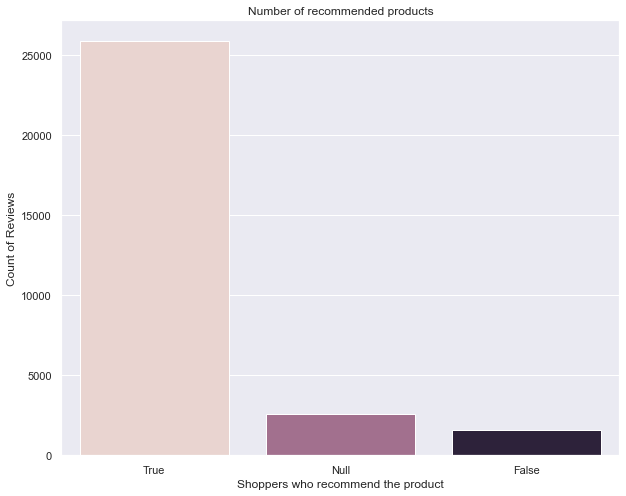

In [22]:
# on the reviews_doRecommend column, replace null values with "Null"
ebuss_dataset['reviews_doRecommend'].fillna('Null', inplace=True)

# Let's plot a distribution to understand reviews_doRecommend better
plt.figure(figsize=(10,8))
sns.set_theme(style="darkgrid")

# Calculating shopers who actually purchased and reviewed
counts = ebuss_dataset['reviews_doRecommend'].value_counts()
# Plotting the Chart
axes = sns.barplot(x=counts.index, y=counts, palette='ch:0');
# Setting Axes labels and title of the chart
axes.set(xlabel='Shoppers who recommend the product',ylabel='Count of Reviews', title='Number of recommended products');

Many products were recommended by the users but this column won't be significant for our analysis, hence drop it

In [23]:
ebuss_dataset.drop('reviews_doRecommend',axis=1,inplace=True)
ebuss_dataset.head()

,id,brand,categories,manufacturer,name,reviews_date,reviews_rating,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Universal Music Group / Cash Money,Pink Friday: Roman Reloaded Re-Up (w/dvd),2012-11-30T06:21:45.000Z,5,joshua,1,Just Awesomei love this album. it's very good....
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,dorothy w,1,GoodGood flavor. This review was collected as ...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg,Lundberg Organic Cinnamon Toast Rice Cakes,2017-07-09T00:00:00.000Z,5,dorothy w,1,GoodGood flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-01-06T00:00:00.000Z,1,rebecca,0,DisappointedI read through the reviews on here...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y,K-Y Love Sensuality Pleasure Gel,2016-12-21T00:00:00.000Z,1,walker557,0,IrritationMy husband bought this gel for us. T...


In [24]:
ebuss_dataset_info = computeMissingValueProportions(ebuss_dataset)
ebuss_dataset_info 

manufacturer        0.4700
reviews_username    0.2100
reviews_date        0.1533
dtype: float64

Review_date and manufacturer doesn't have much impact on our analysis, hence we can drop them

In [25]:
ebuss_dataset.drop(['reviews_date', 'manufacturer'],axis=1,inplace=True)
ebuss_dataset_info = computeMissingValueProportions(ebuss_dataset)
ebuss_dataset_info 

reviews_username    0.21
dtype: float64

If we don't know user then we wont be able to suggest thus it's important. We can see a very little amount of data is missing from the column username i.e. 0.21%, thus we can drop the missing rows

In [26]:
ebuss_dataset.dropna(inplace=True)
ebuss_dataset_info = computeMissingValueProportions(ebuss_dataset)
ebuss_dataset_info 


Series([], dtype: float64)

In [27]:
ebuss_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                29937 non-null  object
 1   brand             29937 non-null  object
 2   categories        29937 non-null  object
 3   name              29937 non-null  object
 4   reviews_rating    29937 non-null  int64 
 5   reviews_username  29937 non-null  object
 6   user_sentiment    29937 non-null  int64 
 7   reviews           29937 non-null  object
dtypes: int64(2), object(6)
memory usage: 2.1+ MB


In [28]:
ebuss_dataset.head()

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,1,Just Awesomei love this album. it's very good....
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,GoodGood flavor. This review was collected as ...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,GoodGood flavor.
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,rebecca,0,DisappointedI read through the reviews on here...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,walker557,0,IrritationMy husband bought this gel for us. T...


## 2. Text preprocessing:
The next part is text preprocessing. For this first we need to remove stopwords. But before that let's convert text into lowercase.

In [29]:
# Let's create a function to convert text into lowercase and remove stopwords or special characters if present any
def text_preprocess(token):
    # Tokenize the words
    tokens = word_tokenize(token)
    # Convert to lowercase
    words_lower = [word.lower() for word in tokens]
    # Removing stopwords
    words_nostop = [word for word in words_lower if word not in stopwords.words('english')]
    # Removing special characters
    text = ' '.join(re.sub('[^a-zA-Z0-9]+', ' ', word) for word in words_nostop)
    # Return the preprocessed text
    return  text


In [30]:
# Now let's preprocess reviews received from different users
ebuss_dataset['reviews'] = ebuss_dataset['reviews'].apply(lambda x:text_preprocess(x))

In [31]:
# Let's check if the stop words are removed
ebuss_dataset['reviews'].tail()

29995    softness     got conditioner influenster try i...
29996    love iti love   received review purposes influ...
29997    hair smooth usefirst love smell product   wash...
29998    perfect oily hair   received influenster never...
29999    conditioned healthyi received product complime...
Name: reviews, dtype: object

In [32]:
ebuss_dataset.head()

,id,brand,categories,name,reviews_rating,reviews_username,user_sentiment,reviews
0,AV13O1A8GV-KLJ3akUyj,Universal Music,"Movies, Music & Books,Music,R&b,Movies & TV,Mo...",Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua,1,awesomei love album s good hip hop side c...
1,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,goodgood flavor review collected part promot...
2,AV14LG0R-jtxr-f38QfS,Lundberg,"Food,Packaged Foods,Snacks,Crackers,Snacks, Co...",Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w,1,goodgood flavor
3,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,rebecca,0,disappointedi read reviews looking buying one ...
4,AV16khLE-jtxr-f38VFn,K-Y,"Personal Care,Medicine Cabinet,Lubricant/Sperm...",K-Y Love Sensuality Pleasure Gel,1,walker557,0,irritationmy husband bought gel us gel cause...


In [33]:
# Let's store the cleaned and preprocessed csv separately
ebuss_dataset.to_csv('ebuss_dataset.csv')

# Visualise the data

(-0.5, 399.5, 199.5, -0.5)

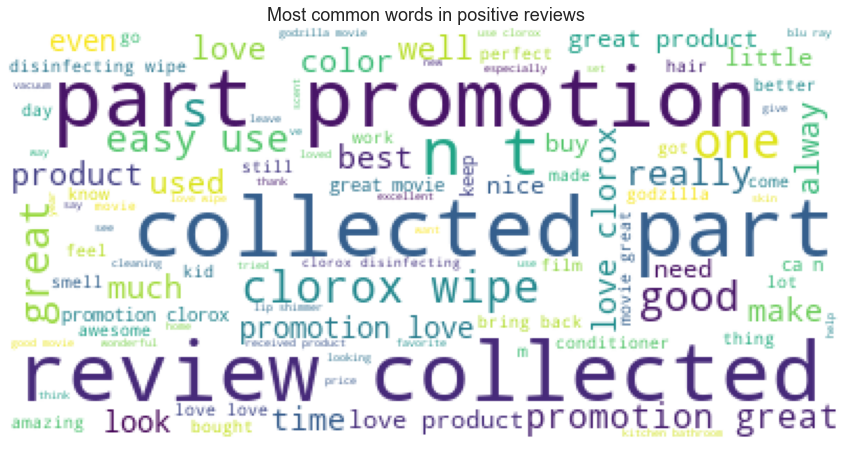

In [34]:
# Wordcloud to visualize Positive reviews
plt.figure(figsize=(15,15))
word_cloud = WordCloud(background_color="white", max_words=100, max_font_size=50)
pos_case=" ".join(ebuss_dataset[ebuss_dataset.user_sentiment==1]['reviews'].values)
word_cloud.generate(pos_case)
plt.title("Most common words in positive reviews", fontsize=18)
plt.imshow(word_cloud)
plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

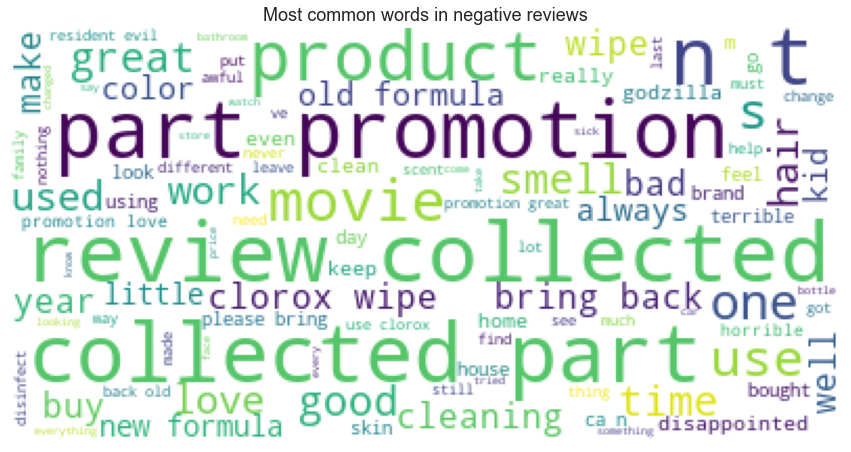

In [35]:
# Wordcloud to visualize Negative reviews
plt.figure(figsize=(15,15))
word_cloud = WordCloud(background_color="white", max_words=100, max_font_size=50)
neg_case=" ".join(ebuss_dataset[ebuss_dataset.user_sentiment==0]['reviews'].values)
word_cloud.generate(neg_case)
plt.title("Most common words in negative reviews", fontsize=18)
plt.imshow(word_cloud)
plt.axis('off')

<AxesSubplot:xlabel='user_sentiment', ylabel='count'>

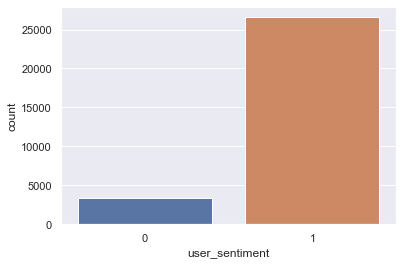

In [36]:
#Visualize target
sns.countplot(x='user_sentiment',data=ebuss_dataset)

Above plot shows imbalanced dataset. There are more positive reviews than negative ones.

## 3. Sentiment Analysis


       To build sentiment analysis model, take reviews given by the users. 
       Steps followed:
       1. Feature extraction using tf-idf
       2. Handling imbalance
       3. Build 3 ML models 

In [37]:
# dataframe for sentiment analysis
review_df = ebuss_dataset[['name','reviews','user_sentiment']]
review_df.head()

,name,reviews,user_sentiment
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),awesomei love album s good hip hop side c...,1
1,Lundberg Organic Cinnamon Toast Rice Cakes,goodgood flavor review collected part promot...,1
2,Lundberg Organic Cinnamon Toast Rice Cakes,goodgood flavor,1
3,K-Y Love Sensuality Pleasure Gel,disappointedi read reviews looking buying one ...,0
4,K-Y Love Sensuality Pleasure Gel,irritationmy husband bought gel us gel cause...,0


### 1. Test-train split

In [38]:
# let's divide the dataset into training and test set
X_train, X_test, y_train, y_test = train_test_split(review_df['reviews'], review_df['user_sentiment'],test_size=0.30, random_state=42)
X_train.shape

(20955,)

#### 1. Feature Extraction using tf-idf

In [39]:
# Using tf-idf vectorizer to extract features from text.
vectorizer= TfidfVectorizer(max_features=3000, lowercase=True, analyzer='word', stop_words= 'english')
tf_idf_x_train = vectorizer.fit_transform(X_train).toarray()
tf_idf_x_test = vectorizer.transform(X_test)
tf_idf_x_train.shape

(20955, 3000)

#### 2. Handling imbalance

In [40]:
# Using SMOTE to handle class imbalance
print('Before Sampling')
print(Counter(y_train))

sm = SMOTE(random_state=42)
X_train_sm ,y_train_sm = sm.fit_resample(tf_idf_x_train,y_train)

print('After Sampling')
print(Counter(y_train_sm))

Before Sampling
Counter({1: 18570, 0: 2385})
After Sampling
Counter({1: 18570, 0: 18570})


#### 3. Model Building

#### Model 1 - Navie Bayes:

In [41]:
# Navie bayes
model_NB = MultinomialNB().fit(X_train_sm, y_train_sm)

#model evaluation

y_prob_test=model_NB.predict_proba(tf_idf_x_test)
y_pred_test=model_NB.predict(tf_idf_x_test)

print('Test Score:')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_test),"\n")
print('Classification Report:')
print(classification_report(y_test,y_pred_test),"\n")
print('AUC-ROC=',roc_auc_score(y_test, y_prob_test[:,1]))
    

fpr_NB, tpr_NB, thresholds_NB = roc_curve(y_test, y_prob_test[:,1])

AUC_ROC_NB = roc_auc_score(y_test, y_prob_test[:,1])

Test Score:
Confusion Matrix:
[[ 609  364]
 [1235 6774]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.63      0.43       973
           1       0.95      0.85      0.89      8009

    accuracy                           0.82      8982
   macro avg       0.64      0.74      0.66      8982
weighted avg       0.88      0.82      0.84      8982
 

AUC-ROC= 0.8255702057692804


#### Model:2 Logistic Regression

In [42]:
# Logistic Regression obj created
lr=LogisticRegression()
params={'C':[10, 1, 0.5, 0.1],'penalty':['l1','l2'],'class_weight':['balanced']}

# Create grid search using 4-fold cross validation
grid_search = GridSearchCV(lr, params, cv=4, scoring='roc_auc', n_jobs=-1)
grid_search.fit(X_train_sm, y_train_sm)
model_LR = grid_search.best_estimator_
model_LR.fit(X_train_sm, y_train_sm)

# Logitic model evalution
y_prob_test=model_LR.predict_proba(tf_idf_x_test)
y_pred_test=model_LR.predict(tf_idf_x_test)

print('Test Score:')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_test),"\n")
print('Classification Report:')
print(classification_report(y_test,y_pred_test),"\n")
print('AUC-ROC=',roc_auc_score(y_test, y_prob_test[:,1]))
    

fpr_LR, tpr_LR, thresholds_LR = roc_curve(y_test, y_prob_test[:,1])

AUC_ROC_LR = roc_auc_score(y_test, y_prob_test[:,1])


C:\Users\singh\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.97387773        nan 0.96772108        nan 0.96282334
        nan 0.94324256]
  warnings.warn(
C:\Users\singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test Score:
Confusion Matrix:
[[ 652  321]
 [ 697 7312]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.67      0.56       973
           1       0.96      0.91      0.93      8009

    accuracy                           0.89      8982
   macro avg       0.72      0.79      0.75      8982
weighted avg       0.91      0.89      0.89      8982
 

AUC-ROC= 0.9061470799102294


C:\Users\singh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### Model: 3 Random Forest

In [43]:
# Let's create an object of RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

params_rf={'max_depth': [5, 10, 20],
          'min_samples_leaf': [5, 10, 20],
          'n_estimators': [10, 30, 50]
}

random_search = RandomizedSearchCV(rf, params_rf, cv=4, n_jobs=-1, verbose=1,scoring='roc_auc')

random_search.fit(X_train_sm, y_train_sm)
model_RF = random_search.best_estimator_

#Random forest model evaluation
y_prob_test=model_RF.predict_proba(tf_idf_x_test)
y_pred_test=model_RF.predict(tf_idf_x_test)

print('Test Score:')
print('Confusion Matrix:')
print(confusion_matrix(y_test,y_pred_test),"\n")
print('Classification Report:')
print(classification_report(y_test,y_pred_test),"\n")
print('AUC-ROC=',roc_auc_score(y_test, y_prob_test[:,1]))

fpr_RF, tpr_RF, thresholds_RF = roc_curve(y_test, y_prob_test[:,1])
AUC_ROC_RF = roc_auc_score(y_test, y_prob_test[:,1])

Fitting 4 folds for each of 10 candidates, totalling 40 fits
Test Score:
Confusion Matrix:
[[ 577  396]
 [1267 6742]] 

Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.59      0.41       973
           1       0.94      0.84      0.89      8009

    accuracy                           0.81      8982
   macro avg       0.63      0.72      0.65      8982
weighted avg       0.88      0.81      0.84      8982
 

AUC-ROC= 0.82453180562412


### Let's compare the models now

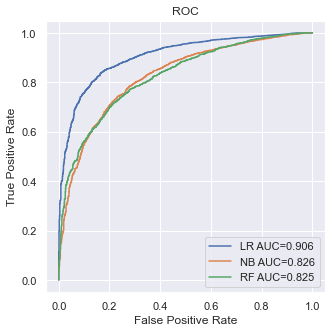

In [44]:
# ROC plot for Logistic Regression, Naive Bayes and Random Forest
plt.figure(figsize=(5, 5))
plt.plot( fpr_LR, tpr_LR, label=f'LR AUC={round(AUC_ROC_LR,3)}' )
plt.plot( fpr_NB, tpr_NB, label=f'NB AUC={round(AUC_ROC_NB,3)}' )
plt.plot( fpr_RF, tpr_RF, label=f'RF AUC={round(AUC_ROC_RF,3)}' )
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()


###

#### Save model:
    From the plot Logistic regression performs better than other models.

In [45]:
# store tf-idf model
with open("tfidf_model.pkl", 'wb') as file:
    pickle.dump(vectorizer, file)

In [46]:
# save logistic regression model
with open('LR_sentiment_model.pkl', 'wb') as file:
    pickle.dump(model_LR, file)

In [47]:
# save logistic regression model
with open('df_sentiment_model.pkl', 'wb') as file:
    pickle.dump(ebuss_dataset, file)

Now we can proceed to create recommendation system

# Recommendation system:
    1. Item based recommedation system
    2. User based recommendation system    

To build recommendation system we'll be needing user name , product name and review ratings.

In [48]:
# let's create a dataframe for recommedation system
recommendation_dataframe = ebuss_dataset[['name','reviews_rating','reviews_username']]
recommendation_dataframe.head()

,name,reviews_rating,reviews_username
0,Pink Friday: Roman Reloaded Re-Up (w/dvd),5,joshua
1,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
2,Lundberg Organic Cinnamon Toast Rice Cakes,5,dorothy w
3,K-Y Love Sensuality Pleasure Gel,1,rebecca
4,K-Y Love Sensuality Pleasure Gel,1,walker557


In [49]:
recommendation_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29937 entries, 0 to 29999
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   name              29937 non-null  object
 1   reviews_rating    29937 non-null  int64 
 2   reviews_username  29937 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.9+ MB


### Test Train Split
Let's split the dataset to test and train dataset

In [50]:
# Test and Train split of the dataset
train_set, test_set = train_test_split(recommendation_dataframe, test_size=0.30, random_state=30)
print(train_set.shape)
print(test_set.shape)

(20955, 3)
(8982, 3)


In [51]:
print("Unique Name: " +str(train_set.name.nunique()))
print("Reviews Username: " +str(train_set.reviews_username.nunique()))

Unique Name: 256
Reviews Username: 18249


In [52]:
# Pivot the train dataset into matrix format in which columns are products and the rows are user names.
pivot_dataframe = train_set.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(0)

pivot_dataframe.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Man Jack Pomade Signature Mint Scent,Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Wa

In [54]:
pivot_dataframe.shape

(18249, 256)

### Creating Dummy train and test

In the process of building a recommendation system, we do not want to recommend a product that the user has already rated or in some cases has performed some action on it such as view, like, share or comment. To eliminate these products from the recommendation list, you will need to take the help of a ‘dummy data set’.


In [55]:
# Copy the train dataset into dummy_train
dummy_train = train_set.copy()

# The movies not rated by user is marked as 1 for prediction. 
dummy_train['reviews_rating'] = dummy_train['reviews_rating'].apply(lambda x: 0 if x>=1 else 1)

# Convert the dummy train dataset into matrix format.
dummy_train = dummy_train.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).fillna(1)

dummy_train.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Man Jack Pomade Signature Mint Scent,Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Wa

In [56]:
dummy_train.shape

(18249, 256)

## User Similarity Matrix:

### Using adjusted Cosine similarity:

 Here, we are not removing the NaN values and calculating the mean only for the movies rated by the user

In [57]:
df_pivot = train_set.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
)
df_pivot.head(3)

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Man Jack Pomade Signature Mint Scent,Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Wa

In [58]:
# Normalising the rating of the movie for each user around 0 mean
mean = np.nanmean(df_pivot, axis=1)
normalised_df = (df_pivot.T-mean).T
normalised_df.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Man Jack Pomade Signature Mint Scent,Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Wa

### Find cosine similarity:
    Used pairwise distance to find similarity.

In [59]:
# Creating the User Similarity Matrix using pairwise_distance function.
user_correlation = 1 - pairwise_distances(normalised_df.fillna(0), metric='cosine')
user_correlation[np.isnan(user_correlation)] = 0
print(user_correlation)

# Ignore the correlation for values less than 0.
user_correlation[user_correlation<0]=0
user_correlation

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Rating predicted by the user is the weighted sum of correlation with the product rating.

In [60]:
user_predicted_ratings = np.dot(user_correlation, df_pivot.fillna(0))
user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [61]:
user_predicted_ratings.shape

(18249, 256)

In [62]:
# user_final_rating -> this contains predicted ratings for products
user_final_rating = np.multiply(user_predicted_ratings,dummy_train)
user_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Man Jack Pomade Signature Mint Scent,Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Wa

### Find the top 5 recommendation for the *user*

In [63]:
# Take the user ID as input [bob,00sab00]
#user_input = str(input("Enter your user name"))
user_input = str('00sab00') # for checking

# Recommended products for the selected user based on ratings
out_recommendation = user_final_rating.loc[user_input].sort_values(ascending=False)[:20]
out_recommendation

name
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest                          0.0
100:Complete First Season (blu-Ray)                                                    0.0
Olay Regenerist Deep Hydration Regenerating Cream                                      0.0
Olivella Bar Soap - 3.52 Oz                                                            0.0
Orajel Maximum Strength Toothache Pain Relief Liquid                                   0.0
Pacific Natural Foods Organic Beef Broth                                               0.0
Pantene Color Preserve Volume Shampoo, 25.4oz                                          0.0
Pantene Pro-V Expert Collection Age Defy Conditioner                                   0.0
Pendaflex174 Divide It Up File Folder, Multi Section, Letter, Assorted, 12/pack        0.0
Physicians Formula Mineral Wear Talc-Free Mineral Correcting Powder, Creamy Natural    0.0
Physicians Formula Powder Palette Mineral Glow Pearls, Translucent Pearl             

### Evaluation - User User 

In [64]:
# Find out the common users of test and train dataset.
common_users = test_set[test_set.reviews_username.isin(train_set.reviews_username)]
common_users.shape

(2023, 3)

In [65]:
# convert into the user-product matrix.
common_user_based_matrix = common_users.pivot_table(index='reviews_username', columns='name', 
                                              values='reviews_rating')
# Convert the user_correlation matrix into dataframe.
user_correlation_df = pd.DataFrame(user_correlation)

user_correlation_df['userId'] = normalised_df.index
user_correlation_df.set_index('userId',inplace=True)
user_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,...,17999,18000,18001,18002,18003,18004,18005,18006,18007,18008,18009,18010,18011,18012,18013,18014,18015,18016,18017,18018,18019,18020,18021,18022,18023,18024,18025,18026,18027,18028,18029,18030,18031,18032,18033,18034,18035,18036,18037,18038,18039,18040,18041,18042,18043,18044,18045,18046,18047,18048,18049,18050,18051,18052,18053,18054,18055,18056,18057,18058,18059,18060,18061,18062,18063,18064,18065,18066,18067,18068,18069,18070,18071,18072,18073,18074,18075,18076,18077,18078,18079,18080,18081,18082,18083,18084,18085,18086,18087,18088,18089,18090,18091,18092,18093,18094,18095,18096,18097,18098,18099,18100,18101,18102,18103,18104,18105,18106,18107,18108,18109,18110,18111,18112,18113,18114,18115,18116,18117,18118,18119,18120,18121,18122,18123,18124,18125,18126,18127,18128,18129,18130,18131,18132,18133,18134,18135,18136,18137,18138,18139,18140,18141,18142,18143,18144,18145,18146,18147,18148,18149,18150,18151,18152,18153,18154,18155,18156,18157,18158,18159,18160,18161,18162,18163,18164,18165,18166,18167,18168,18169,18170,18171,18172,18173,18174,18175,18176,18177,18178,18179,18180,18181,18182,18183,18184,18185,18186,18187,18188,18189,18190,18191,18192,18193,18194,18195,18196,18197,18198,18199,18200,18201,18202,18203,18204,18205,18206,18207,18208,18209,18210,18211,18212,18213,18214,18215,18216,18217,18218,18219,18220,18221,18222,18223,18224,18225,18226,18227,18228,18229,18230,18231,18232,18233,18234,18235,18236,18237,18238,18239,18240,18241,18242,18243,18244,18245,18246,18247,18248
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00dog3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.

In [66]:
common_users.head(3)

,name,reviews_rating,reviews_username
25840,Godzilla 3d Includes Digital Copy Ultraviolet ...,5,great
28741,Chobani174 Strawberry On The Bottom Non-Fat Gr...,5,grammy
19507,Clorox Disinfecting Bathroom Cleaner,5,robbiesgirl26


In [67]:
list_name = common_users.reviews_username.tolist()
user_correlation_df.columns = normalised_df.index.tolist()

user_correlation_df_1 =  user_correlation_df[user_correlation_df.index.isin(list_name)]
user_correlation_df_1.shape

(1698, 18249)

In [68]:
user_correlation_df_2 = user_correlation_df_1.T[user_correlation_df_1.T.index.isin(list_name)]

In [69]:
user_correlation_df_3 = user_correlation_df_2.T
user_correlation_df_3.head()

,00sab00,1234,1234567,1234asdf,143st,1943,23jen,37f5p,4djs,7.87E+11,8ellie24,a hutch,aalyah,abbey,abbi,abby,abcgator,abismomy,abret,ac94,acg1,aclass,actionaction,adam,addmotherhood25,adelynsmom,adma2,adrienne,ael26,aep1010,afooey,agmt,ahjohnson1983,aimee,aj1135,ajcrossover11,ajface24,akesler19,akporter84,alarm,alena125,alex,alex5514,alexa86,alexis,alice,alix p,allie,allie123,ally,aluns,aly16,amanda,amanda13,amber,amber0405,ambr1207,ambybambi0725,amerbamer,amgo2,ammi,amor,amsey,amsmes26,amy1,amy77,amyw333,anabanana2112,anas79,andie,andiejo,andrea,andy,angc,angel,angela,angelbabee1965,angie,angie0104,angie2,angie447,angiesmessykids,anita,anna,anne,annie,annie4u,annoymous,anthony,aphoung,april,aria,arlene,arlingtondonna,arno,arob,aros,ash1,ashley,ashley000,askk808,asnyc,atg29,audra,augale,auntsan,autumn,awesome,awesomesunshine,babas,backspace831,badgrl3616,badhairbob,baker,bakerbill,bambi,barb,barb24,barbara,barbarajean,barber226,bargainhuntergmaoftwo,bargainshopper,batman,batts,bbbb,bbjj,bdinnc,beanie,beautiful disaster,becca,beccaruth,beck12,becky,becky25,becky39,becky75,beebee,bella,bernie,berreca,bert,beso,bessie,bestbuyer,besty,beth,beth46,beth74,betty,beverly,bg13,bigd,bigdaddybuttah,bigdog,bigdogwood,bigred,bill,bill k,billierose,bird,bkenyon,bkeys1965,blaze,blue,bluebox,bluefox,blurunner,bmk14,bob,bob1,bobbi,bobbie09,bobby,bonbon,boo boo,bowinkle,brad,brady,brandon,brandy,brandy33,branfachris,bree123445,breezy,bren,bri_tairi,brian,brittany,brniii13,broje,brooke0722,browndiva007,bru1,bruce,bryanonthebeach,bsgw,bskye,bsolheim9,bubbasmom,bubbs33,bubby,buckeye,bullhorn,bumblebee0513,bunny,busybee1995,busymom,buttercup,buty,buyer123,bwoh,by...,byamazon customer,bybarbara edwards,byc. coombs,byjennifer,bykindle customer,"byl j bruss, d.o.",bylaura c,bzylema,c1a5,cabello,cadydid,cami,candice16542,canela2,cangel83,cannon,canyons422,carlos,carls,carol,carol1102,carolnog22,carrie,carriea,carrot1991,carsonensley,caseo,cass,cassandra,cassie,cassie h,cate1,catfan,catherine4155,cathy123,cathy27,cber,...,sporkette,sportster03,spov,spunky,spunkytoo,spyguy,squat,squeak,sr1111,sriracha,sscc,sslank,stacey,stacey15,staclove,stacy,stacy82,star,state,stef31,stefanie2312,stefy624,steph,steph1002,steph2012,steph2026,steph65,stephanie,stephanie1219,stephanie78,stephcakes,stephhh,stephs,steve,steverap,stevie,stldiane,stouticus,strandedinwi,sue,suewho,summer2474,sunflower,sunny2,sunshine,superj,superjenn,superman,superrj,supertaz93,suri,susan,susan1,susie,susie72,susu,suzan k,suzanne,suzybear,suzzz,sverm,sweet,sweets,swimmer2005,sydmikery,syms1,taliacrayon24,tam03,tami,tami62,tammy,tammy1976,tammy27,tampa,tamtam,tango757,tangon,tania13,tara,taraburger,taratully,tarheelfan,tasha marie,tata87,tati2015,tausha,tayaktar,tayy,tb10,tbbv,tdyork23,teacher,techgeek,teckys4,teerudy,teetee,teresa,terry,tess,tess22,test12,tete1180,tetter74,texsangel,tfdc73,tgdsa,tgregory,thai,thatguy,the boss,the happy cleaner,the office guro,the1stbambito,thebestthing,thecleaninglady,thecorleys2011,themcdermitts,themoviemaniac,thenaptimereviewer,thequeen,theresa79,theresabp,thetank,thom,thomas,thoppe7,thr4492,thumperthebunny,tierrah,tiffany,tifflet10,timm,timmah,timothy,tina,tinanmel,tink,tinkerbelle1616,tinytom,tired arms,tjacksonn,tmouada,tmoxvan,tobaira,todd,toddster7,tommty41,tone,tony,tonybdub,tooney38,toots,tootsie23,toridear,toshcal,tr3c,tracelyn28,tracie,tracy,trav,trichmond,tricia,trina,trisha,trix,truth,tstarr,ttdebbi,ttop,tucker65,turi,turtle,turtleboy,turtlesgirl7,tweetyanne,twotone,tycr,typist,udoindesert,ulcunique,usaf1,uu1622,val,val214,valerie,valery,vanita80,vc13,veebee3,venus24,vette,vicki,vickie,vickie456,vicocious,victoria29,viewer,viking80,vikki,viper,vivian,vivienne,vkay,vlo910,voxemluth,vypkf0,wally,wally123,walt,want297z,warren,wcgirl,weewee,wendy,wendy2245,wernigcourtney,weston t,whythis,wildclay12,wildman,wind,windowkitty,wise,wizard,wolf,wolverine,woody,workingmomof1,wowiezowie,wowwie,wren113,wvshopaholic,xavier,xmom,yamel97,yayatex,yayawomack,yazzmi

In [70]:
user_correlation_df_3.shape

(1698, 1698)

In [71]:
user_correlation_df_3[user_correlation_df_3<0]=0

common_user_predicted_ratings = np.dot(user_correlation_df_3, common_user_based_matrix.fillna(0))
common_user_predicted_ratings

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
dummy_test = common_users.copy()
dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)
dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').fillna(0)
common_user_predicted_ratings = np.multiply(common_user_predicted_ratings,dummy_test)
common_user_predicted_ratings

name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Ambi Complexion Cleansing Bar,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium","Beanitos Bean Chips, Simply Pinto Bean",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct","Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Head & Shoulders Classic Clean Conditioner,Hollywood Beauty Olive Cholesterol,Holmes174 Personal Indoor Heater W/ Manual Controls White 1500w Hfh131-N,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,"Hormel Chili, No Beans",Jason Aldean - They Don't Know,"Johnson's Baby Bubble Bath and Wash, 15oz",Jolly Time Select Premium Yellow Pop Corn,"Just For Men Touch Of Gray Gray Hair Treatment, Black T-55",K-Y Love Sensuality Pleasure Gel,Kendall Comforter And Sheet Set (twin) Aqua - 7pc,Kind Nut Delight Bar,Kraus FVS-1007 Single Hole Vessel Bathroom Faucet from the Ramus Collection,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty,"L'oreal Paris Visible Lift Smooth Absolute, Natural Buff",Little Bedding By Nojo Jungle Dreams 2 Pack Sheet Set,Lundberg Organic Cinnamon Toast Rice Cakes,"Lundberg Wehani Rice, 25lb",Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer,"Lysol Concentrate Deodorizing Cleaner, Original Scent",Mike Dave Need Wedding Dates (dvd + Digital),Mill Creek Aloe Vera & Paba Lotion,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),Nature's Path Flax Plus Maple Pecan Crunch Cereal,Naturtint Nutrideep Multiplier Protective Cream,Nearly Natural 5.5' Bamboo W/decorative Planter,Nearly Natural Pothos Ledge Plant (set On Foam) Silk Plant,"Newman's Own Balsamic Vinaigrette, 16.0oz","Newman's Own Organics Licorice Twist, Black 5oz",Nexxus Exxtra Gel Style Creation Sculptor,Ogx Anti-breakage Keratin Oil 3 Minute Miracu

In [73]:
# Find RMSE
X  = common_user_predicted_ratings.copy() 
X = X[X>0]
scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))
print(y)

C:\Users\singh\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\singh\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


In [74]:
common_users_pv = common_users.pivot_table(index='reviews_username', columns='name', values='reviews_rating')
common_users_pv.head()


name,100:Complete First Season (blu-Ray),Alex Cross (dvdvideo),Ambi Complexion Cleansing Bar,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium","Beanitos Bean Chips, Simply Pinto Bean",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets","Burt's Bees Lip Shimmer, Raisin",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,CeraVe SA Renewing Cream,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct","Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Head & Shoulders Classic Clean Conditioner,Hollywood Beauty Olive Cholesterol,Holmes174 Personal Indoor Heater W/ Manual Controls White 1500w Hfh131-N,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,"Hormel Chili, No Beans",Jason Aldean - They Don't Know,"Johnson's Baby Bubble Bath and Wash, 15oz",Jolly Time Select Premium Yellow Pop Corn,"Just For Men Touch Of Gray Gray Hair Treatment, Black T-55",K-Y Love Sensuality Pleasure Gel,Kendall Comforter And Sheet Set (twin) Aqua - 7pc,Kind Nut Delight Bar,Kraus FVS-1007 Single Hole Vessel Bathroom Faucet from the Ramus Collection,L'or233al Paris Elvive Extraordinary Clay Rebalancing Conditioner - 12.6 Fl Oz,L'oreal Paris Advanced Hairstyle TXT IT Hyper-Fix Putty,"L'oreal Paris Visible Lift Smooth Absolute, Natural Buff",Little Bedding By Nojo Jungle Dreams 2 Pack Sheet Set,Lundberg Organic Cinnamon Toast Rice Cakes,"Lundberg Wehani Rice, 25lb",Lynk Professional174 Pull Out Cutting Board Bakeware Sliding Cabinet Organizer,"Lysol Concentrate Deodorizing Cleaner, Original Scent",Mike Dave Need Wedding Dates (dvd + Digital),Mill Creek Aloe Vera & Paba Lotion,Mrs. Meyer's174 Lemon Verbena Laundry Scent Booster - 18oz,My Big Fat Greek Wedding 2 (blu-Ray + Dvd + Digital),Nature's Path Flax Plus Maple Pecan Crunch Cereal,Naturtint Nutrideep Multiplier Protective Cream,Nearly Natural 5.5' Bamboo W/decorative Planter,Nearly Natural Pothos Ledge Plant (set On Foam) Silk Plant,"Newman's Own Balsamic Vinaigrette, 16.0oz","Newman's Own Organics Licorice Twist, Black 5oz",Nexxus Exxtra Gel Style Creation Sculptor,Ogx Anti-breakage Keratin Oil 3 Minute Miracu

In [75]:
# Finding total non-NaN value
total_non_nan = np.count_nonzero(~np.isnan(y))
rmse_user = round((sum(sum((common_users_pv - y )**2))/total_non_nan)**0.5,2)
print(rmse_user)

2.53


## Item Based Similarity

In [76]:
# take transpose of user based df
pivot_dataframe = train_set.pivot_table(
    index='reviews_username',
    columns='name',
    values='reviews_rating'
).T

pivot_dataframe.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,1.11E+24,1085,11111111aaaaaaaaaaaaaaaaa,1143mom,11677j,1234,1234561,1234567,1234asdf,123too,127726,12cass12,12gage,13ld,13thfaerie,1421nikki,143st,15425shopper,1616,170361eggs,1753,17roses,1863philly,1943,1950rmm,1968bear,19bubba67,1awesome1,1boomer,1buzymom,1cadet,1chynna,1cleaner,1cocoafan,1derpet1,1friendlycat,1gamer,1glenn,1gussy,1happymom,1healthytot,1hotmama,1izzy1,1jc1,1kindword,1movielover2,1nikki31t,1okc2thunder3up4,1olaygal,1scooby1,1shop,1sonny,1stcavdivision,1stgrade,1stlady,1sungirl,1vgarcia,1wildbill2l,1witch,2011mom2b,2011pink2011,2013bestbuyer,2014bestbuys,2015mom,2016,2016home,2016parker10,20crafter16,210tundra,21honey,21please,232323,23jen,2455,2532674594,25happyshopper,2689,28green,2athome,2bgreen,2big,2busy4u,2clean4me,2esinapod,2forhokies,2go4savings,2hearts1love,2iceskates,2shoes,2thumbsup,2total,2xmom,30103,3276teev,3375509742,370gt,37f5p,3babiesat41,3bear,3bees,3boys2turtles5chicks,3dfan,3dknights,3dmoviewatcher,3dpenguin,3dpic,3littleswimmers,3sawhorsesneeded,3scissors,3skyyblue,4 rooms 1 dog lotsa fur,4048197640,405april,4112,4141,44pam44,45177ss,45cleanupwoman,4795181377,49ersfor6,4cloroxl,4djs,4dogmom,4frugal,4gis1975,4katelyn,4littleones,4luds,4momma88,4parman,4stew57,4wipes,500mpl,50cal,5150seriousshopper5150,530germkiller,54867906,57susie,5boysohmy,5mcdaniels,6211958,62deuce,64falcon,6623443094,66cutie,67firebird,69chopper,6utefans,7,7.87E+11,70chp,70cohoosier,714rv,72443,79captm79,7inthenest,7rick,8.84E+11,80021mom,80204,8023,808wrx,85721747267,85lisa,88brit06,89c46698305f04e39d57a88a2c5c3ce297787288,8bithero,8ellie24,8kucs,8rob1,8sk8anddon8,8thred,9003058363,911notimetoshop,9373weld,98nd500,9thdoctor,_christenak,a hutch,a11mxdup,a1cbee1481,a786,a7xmaddlove,aaaa,aaam,aabrannon,aac06002,aac3,aagbaghagmom,aakon,aalyah,aarhus74,aaron,aaronabigail,aaronlab,aaronm,aaube1990,aaulvu,ab1015,ab45,ab86,abacadaba,abananie,abarker1215,abartine,abaybay,abberdoodlesmom,abbey,abbi,abbs77,abby,abby1,abbysmama,abc,abc3,abc4sb206,abcd,abcdefghij,abcgator,abefroman,abel9027,abesb,abeverly7,abg0821,abigail,abigail32,abigail81,abigailc,abihaven,abismomy,abm27,abmurals,aboh,about2bmom,abrams,abret,abruscini,abryant,abyo,ac228,ac90,ac94,acadia,...,wrat,wren113,wrenny,wright11,wrigleysmom,write2kjf,writerstone,wsweetie,wtchawmn,wut54,wuv2sh0p,wvdeb56,wvmommy,wvpcollins,wvshopaholic,wvu1,wwednesday7,wwphf,wxyz,wyatt09,wylynn,wynn,wyomingkat,wyoshopgril,xaiver,xander,xander126,xavenger,xavier,xaviersmommy110311,xbflysky,xblazingsaddles,xbox,xbox1gamer,xcartersmommyx,xcoach98,xcoupon,xena,xenawp,xeon500cc,xfilipinox,xhillbill,xhulia,xiaodan z,xjryan,xkatie,xlivayy,xman5969,xmas,xmen1234,xmhana,xmom,xnerd86x,xnrcr3,xolisa,xolittlebit,xoxorosita,xpjunk,xpotatotitsx,xqhinc,xracer,xray,xraymom,xsbluesugar,xstr8edgex,xtinaa01,xtony,xxcris,xxfloridagirlxx,xxxxxxxxxxxx,xxyy,xyzmom,xzxsarahzxz,y4all,yagerbomb07,yago,yaii,yama,yamel97,yams2536,yang,yangko,yani,yankee23,yankeegirl15,yankeemama73,yankees,yaquiv,yard12,yardleysmother,yari1,yari34,yarihdz,yata32,yayatex,yayawomack,yazh,yazt,yazzmiin,ydteoo,yeag350,yeapmsb,yeeya,yelley,yellow,yellow09,yen0102,yes22,yes2carrotslover,yesman,yesseniaw22,yessi,yessi819,yexzenica,yeya,yeyo,yg007,ygtz,yharkins,yiayiamre,yj45,ymdunn,ymontes923,yoad78,yoadrian,yoamomovies,yogagirl,yogamom,yoganicmommy,yogip,yogurt,yohnie1,yojamey,yoko47,yolandas,yoli1987,yolita,yoliwill,yolo,yolonda24,yolyrn,yoma,yonino,yonoegwa,yoolie,yoona,yooper,yopack,yoperla,yorissa,yorkie6,yorkster88,yosh,yoski,yosuerte,youknowit459,youlooksolovely,youronereviewer,yozer29,ypryor,yram,yrina03,yshan,ythelastman89,yucky111,yulkakapulka,yummy,yunji,yvonne,yyz2112123,z12345,z992,zabdelra,zach,zacharysaunt,zachizz,zachsmom,zak08,zakkzakk,zamanda,zanarkandruinsx2,zanay,zanzan73,zapaduh,zapman,zara07,zarah,zarrahsmommy,zaskar,zaza,zburt5,zchandyman,zebras,zebrastrong,zeek,zeek09,zeeleader,zegan,zenmon,zer0zer0agent,zeramm,zero,zeroonec,zetamom,zfem2,z

In [77]:
# Normalising the movie rating for each movie for using the Adujsted Cosine
mean = np.nanmean(pivot_dataframe, axis=1)
df_subtracted = (pivot_dataframe.T-mean).T
df_subtracted.head()

reviews_username,00dog3,00sab00,01impala,02dakota,02deuce,0325home,06stidriver,1.11E+24,1085,11111111aaaaaaaaaaaaaaaaa,1143mom,11677j,1234,1234561,1234567,1234asdf,123too,127726,12cass12,12gage,13ld,13thfaerie,1421nikki,143st,15425shopper,1616,170361eggs,1753,17roses,1863philly,1943,1950rmm,1968bear,19bubba67,1awesome1,1boomer,1buzymom,1cadet,1chynna,1cleaner,1cocoafan,1derpet1,1friendlycat,1gamer,1glenn,1gussy,1happymom,1healthytot,1hotmama,1izzy1,1jc1,1kindword,1movielover2,1nikki31t,1okc2thunder3up4,1olaygal,1scooby1,1shop,1sonny,1stcavdivision,1stgrade,1stlady,1sungirl,1vgarcia,1wildbill2l,1witch,2011mom2b,2011pink2011,2013bestbuyer,2014bestbuys,2015mom,2016,2016home,2016parker10,20crafter16,210tundra,21honey,21please,232323,23jen,2455,2532674594,25happyshopper,2689,28green,2athome,2bgreen,2big,2busy4u,2clean4me,2esinapod,2forhokies,2go4savings,2hearts1love,2iceskates,2shoes,2thumbsup,2total,2xmom,30103,3276teev,3375509742,370gt,37f5p,3babiesat41,3bear,3bees,3boys2turtles5chicks,3dfan,3dknights,3dmoviewatcher,3dpenguin,3dpic,3littleswimmers,3sawhorsesneeded,3scissors,3skyyblue,4 rooms 1 dog lotsa fur,4048197640,405april,4112,4141,44pam44,45177ss,45cleanupwoman,4795181377,49ersfor6,4cloroxl,4djs,4dogmom,4frugal,4gis1975,4katelyn,4littleones,4luds,4momma88,4parman,4stew57,4wipes,500mpl,50cal,5150seriousshopper5150,530germkiller,54867906,57susie,5boysohmy,5mcdaniels,6211958,62deuce,64falcon,6623443094,66cutie,67firebird,69chopper,6utefans,7,7.87E+11,70chp,70cohoosier,714rv,72443,79captm79,7inthenest,7rick,8.84E+11,80021mom,80204,8023,808wrx,85721747267,85lisa,88brit06,89c46698305f04e39d57a88a2c5c3ce297787288,8bithero,8ellie24,8kucs,8rob1,8sk8anddon8,8thred,9003058363,911notimetoshop,9373weld,98nd500,9thdoctor,_christenak,a hutch,a11mxdup,a1cbee1481,a786,a7xmaddlove,aaaa,aaam,aabrannon,aac06002,aac3,aagbaghagmom,aakon,aalyah,aarhus74,aaron,aaronabigail,aaronlab,aaronm,aaube1990,aaulvu,ab1015,ab45,ab86,abacadaba,abananie,abarker1215,abartine,abaybay,abberdoodlesmom,abbey,abbi,abbs77,abby,abby1,abbysmama,abc,abc3,abc4sb206,abcd,abcdefghij,abcgator,abefroman,abel9027,abesb,abeverly7,abg0821,abigail,abigail32,abigail81,abigailc,abihaven,abismomy,abm27,abmurals,aboh,about2bmom,abrams,abret,abruscini,abryant,abyo,ac228,ac90,ac94,acadia,...,wrat,wren113,wrenny,wright11,wrigleysmom,write2kjf,writerstone,wsweetie,wtchawmn,wut54,wuv2sh0p,wvdeb56,wvmommy,wvpcollins,wvshopaholic,wvu1,wwednesday7,wwphf,wxyz,wyatt09,wylynn,wynn,wyomingkat,wyoshopgril,xaiver,xander,xander126,xavenger,xavier,xaviersmommy110311,xbflysky,xblazingsaddles,xbox,xbox1gamer,xcartersmommyx,xcoach98,xcoupon,xena,xenawp,xeon500cc,xfilipinox,xhillbill,xhulia,xiaodan z,xjryan,xkatie,xlivayy,xman5969,xmas,xmen1234,xmhana,xmom,xnerd86x,xnrcr3,xolisa,xolittlebit,xoxorosita,xpjunk,xpotatotitsx,xqhinc,xracer,xray,xraymom,xsbluesugar,xstr8edgex,xtinaa01,xtony,xxcris,xxfloridagirlxx,xxxxxxxxxxxx,xxyy,xyzmom,xzxsarahzxz,y4all,yagerbomb07,yago,yaii,yama,yamel97,yams2536,yang,yangko,yani,yankee23,yankeegirl15,yankeemama73,yankees,yaquiv,yard12,yardleysmother,yari1,yari34,yarihdz,yata32,yayatex,yayawomack,yazh,yazt,yazzmiin,ydteoo,yeag350,yeapmsb,yeeya,yelley,yellow,yellow09,yen0102,yes22,yes2carrotslover,yesman,yesseniaw22,yessi,yessi819,yexzenica,yeya,yeyo,yg007,ygtz,yharkins,yiayiamre,yj45,ymdunn,ymontes923,yoad78,yoadrian,yoamomovies,yogagirl,yogamom,yoganicmommy,yogip,yogurt,yohnie1,yojamey,yoko47,yolandas,yoli1987,yolita,yoliwill,yolo,yolonda24,yolyrn,yoma,yonino,yonoegwa,yoolie,yoona,yooper,yopack,yoperla,yorissa,yorkie6,yorkster88,yosh,yoski,yosuerte,youknowit459,youlooksolovely,youronereviewer,yozer29,ypryor,yram,yrina03,yshan,ythelastman89,yucky111,yulkakapulka,yummy,yunji,yvonne,yyz2112123,z12345,z992,zabdelra,zach,zacharysaunt,zachizz,zachsmom,zak08,zakkzakk,zamanda,zanarkandruinsx2,zanay,zanzan73,zapaduh,zapman,zara07,zarah,zarrahsmommy,zaskar,zaza,zburt5,zchandyman,zebras,zebrastrong,zeek,zeek09,zeeleader,zegan,zenmon,zer0zer0agent,zeramm,zero,zeroonec,zetamom,zfem2,z

In [78]:
# Finding the cosine similarity using pairwise distances approach . 
# Item Similarity Matrix
item_correlation = 1 - pairwise_distances(df_subtracted.fillna(0), metric='cosine')
item_correlation[np.isnan(item_correlation)] = 0
print(item_correlation)

# Filtering the correlation only for which the value is greater than 0. (Positively correlated)
item_correlation[item_correlation<0]=0
item_correlation

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

## Prediction

In [80]:
item_predicted_ratings = np.dot((pivot_dataframe.fillna(0).T),item_correlation)
item_predicted_ratings

array([[0.        , 0.        , 0.        , ..., 0.0214608 , 0.        ,
        0.        ],
       [0.        , 0.02496344, 0.        , ..., 0.00351082, 0.00721286,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00222932,
        0.00966259],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.00176068,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.00176068,
        0.        ],
       [0.        , 0.04160573, 0.        , ..., 0.00585136, 0.01202144,
        0.        ]])

### Filter the rating only for the products not rated by the user for recommendation.

In [81]:
item_final_rating = np.multiply(item_predicted_ratings,dummy_train)
item_final_rating.head()

name,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz","42 Dual Drop Leaf Table with 2 Madrid Chairs""",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,5302050 15/16 FCT/HOSE ADAPTOR,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alberto VO5 Salon Series Smooth Plus Sleek Shampoo,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz",Avery174 11-1/4 X 9-1/4 Index Maker Extra Wide Label Dividers With 5 Tab - Clear (5 Sets Per Pack),"Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,"Batherapy Natural Mineral Bath Sport Liquid, 16 oz",Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Blue Anchor Design Throw Pillow (18x18) - Rizzy Home,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,"Candy Pink Plastic Cups, 20 pk",Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,"Carson-Dellosa Publishing Photographic Learning Cards Boxed Set, Nouns/verbs/adjectives, Grades K-12",Ceiling Fan With Light White 14.2 X 29.9 X 9.2 - Hunter Fan,CeraVe SA Renewing Cream,"Cetaphil Gentle Skin Cleanser, 2oz",Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,Clorox Ultimate Care Premium Bleach,Cococare 100% Natural Castor Oil,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Disney174 Jake And The Neverland Pirates 4 Piece Bedding Set - Toddler,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Elvis Presley - Girl Happy (cd),Equals (blu-Ray),Every Man Jack Pomade Signature Mint Scent,Fantasy Fields Lil' Sports Fan Step Stool - Teamson,Feit 60-Wa

In [82]:
# Take the user ID as input [bob,00sab00]
#user_input = str(input("Enter your user name"))
user_input = str('00sab00') # for checking

# Recommending the Top 5 products to the user.
recommended_products = item_final_rating.loc[user_input].sort_values(ascending=False)[0:20]
recommended_products

name
Vicks Vaporub, Regular, 3.53oz                                                     0.179393
Stargate (ws) (ultimate Edition) (director's Cut) (dvdvideo)                       0.079616
D-Con Mice Bait Station - 3ct                                                      0.077577
Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans                                    0.052514
Mike Dave Need Wedding Dates (dvd + Digital)                                       0.034586
The Seaweed Bath Co. Argan Conditioner, Smoothing Citrus                           0.033954
100:Complete First Season (blu-Ray)                                                0.024963
The Resident Evil Collection 5 Discs (blu-Ray)                                     0.020768
Bi-O-kleen Spray & Wipe All Purpose Cleaner                                        0.020030
Musselman Apple Sauce, Cinnamon, 48oz                                              0.019920
Hawaiian Punch Berry Limeade Blast Juice                                   

### Evaluation:
    Evaluation will we same as you have seen above for the prediction. The only difference being, you will evaluate for the products already rated by the user insead of predicting it for the products not rated by the user. 

In [92]:
common =  test_set[test_set.name.isin(train_set.name)]
common.shape

(8966, 3)

In [93]:
# common_item_based_matrix = common_users.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T
# common_item_based_matrix.shape

common_item_based_matrix = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T
common_item_based_matrix.shape

(201, 8348)

In [94]:
item_correlation_df = pd.DataFrame(item_correlation)
item_correlation_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038265,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.01622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003451,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003189,0.0,0.0,0.0,0.0,0.0,0.006211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [95]:
item_correlation_df['name'] = df_subtracted.index
item_correlation_df.set_index('name',inplace=True)
item_correlation_df.head(3)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255
name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.116369,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.038265,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.01622,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.013701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100:Complete First Season (blu-Ray),0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.003451,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003189,0.0,0.0,0.0,0.0,0.0,0.006211,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010133,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008321,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001048,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001277,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.001568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [96]:
list_name = common.name.tolist()
item_correlation_df.columns = df_subtracted.index.tolist()
item_correlation_df_1 =  item_correlation_df[item_correlation_df.index.isin(list_name)]
item_correlation_df_2 = item_correlation_df_1.T[item_correlation_df_1.T.index.isin(list_name)]

item_correlation_df_3 = item_correlation_df_2.T
item_correlation_df_3.head(3)

,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. Fire File Chest,100:Complete First Season (blu-Ray),2017-2018 Brownline174 Duraflex 14-Month Planner 8 1/2 X 11 Black,"2x Ultra Era with Oxi Booster, 50fl oz",4C Grated Parmesan Cheese 100% Natural 8oz Shaker,Africa's Best No-Lye Dual Conditioning Relaxer System Super,Alex Cross (dvdvideo),"All,bran Complete Wheat Flakes, 18 Oz.",Ambi Complexion Cleansing Bar,Annie's Homegrown Deluxe Elbows & Four Cheese Sauce,Annie's Homegrown Gluten Free Double Chocolate Chip Granola Bars,Arrid Extra Dry Anti-Perspirant Deodorant Spray Regular,"Aussie Aussome Volume Shampoo, 13.5 Oz","Australian Gold Exotic Blend Lotion, SPF 4","Aveeno Baby Continuous Protection Lotion Sunscreen with Broad Spectrum SPF 55, 4oz","Avery174 Ready Index Contemporary Table Of Contents Divider, 1-8, Multi, Letter",Axe Dry Anti-Perspirant Deodorant Invisible Solid Phoenix,"BRIDGESTONE 130/70ZR18M/C(63W)FRONT EXEDRA G851, CRUISER RADL","Banana Boat Sunless Summer Color Self Tanning Lotion, Light To Medium",Barielle Nail Rebuilding Protein,Baxter Of California Cream Pomade,"Beanitos Bean Chips, Simply Pinto Bean",Bedtime Originals Pinkie Musical Mobile,"Ben & Jerry's Coffee, Coffee Buzzbuzzbuzz! Ice Cream, Pint","Better Built 74010862 Bet74010862 60In Crossover Two Lid, Deep, Truck Tool Box",Bi-O-kleen Spray & Wipe All Purpose Cleaner,Bilbao Nightstand Gray Oak - South Shore,Bill Glor Gaither - Church In The Wildwood (cd),Bisquick Original Pancake And Baking Mix - 40oz,Black Front Loading Frame Set (8.5x11) Set Of 12,Boraam Sonoma Kitchen Cart With Wire Brush Gray - Maaya Home,"Bounce Dryer Sheets, Fresh Linen, 160 sheets",Bumble Bee Solid White Albacore In Water - 5 Oz,"Burt's Bees Lip Shimmer, Raisin","Burt's Bees Lip Shimmer, Watermelon",Calvin Klein Secret Obsession Eau De Parfum,Cantu Coconut Milk Shine Hold Mist - 8oz,Care Free Curl Gold Instant Activator,"Caress Moisturizing Body Bar Natural Silk, 4.75oz",Cars Toon: Mater's Tall Tales,CeraVe SA Renewing Cream,Charcoal Stone Toothbrush Holder Gray,Cheetos Crunchy Flamin' Hot Cheese Flavored Snacks,Chester's Cheese Flavored Puffcorn Snacks,Chex Muddy Buddies Brownie Supreme Snack Mix,Chips Ahoy! Original Chocolate Chip - Cookies - Family Size 18.2oz,Chips Deluxe Soft 'n Chewy Cookies,Chobani174 Strawberry On The Bottom Non-Fat Greek Yogurt - 5.3oz,Clambake (dvd),Clear Scalp & Hair Therapy Total Care Nourishing Shampoo,Clorox Disinfecting Bathroom Cleaner,Clorox Disinfecting Wipes Value Pack Scented 150 Ct Total,"Colorganics Lipstick, Cayenne",Concept Housewares 36 Natural Wood ceiling mounted pot rack,Coola Organic Sunscreen Classic Face Cucumber SPF 30,"Coty Airspun Face Powder, Translucent Extra Coverage","Creme Of Nature Intensive Conditioning Treatment, 32",Cuisinart174 Electric Juicer - Stainless Steel Cje-1000,D-Con Mice Bait Station - 3ct,Dark Shadows (includes Digital Copy) (ultraviolet) (dvdvideo),Delta Single Handle Shower Faucet,"Dermalogica Special Cleansing Gel, 8.4oz",Diet Canada Dry Ginger Ale - 12pk/12 Fl Oz Cans,Doc Mcstuffins: Friendship Is The Best Medicine,Eagle Fat Free Sweetened Condensed Milk,Equals (blu-Ray),Feit 60-Watt A19 Gu24 Base Led Light Bulb - Soft White,"Finish Gelpacs Dishwasher Detergent, Orange Scent, 84ct","Finish Quantum Dishwasher Detergent, Lemon Sparkle Scent, 45 Count",Fiskars174 Classic Stick Rotary Cutter (45 Mm),Gain Original Scent Liquid Fabric Softener 129 Oz,Godzilla 3d Includes Digital Copy Ultraviolet 3d/2d Blu-Ray/dvd,Happy Tot Apple and Butternut Squash,Hawaiian Punch Berry Limeade Blast Juice,Head & Shoulders Classic Clean Conditioner,Heiress (dvd),Hollywood Beauty Olive Cholesterol,Holmes174 Personal Indoor Heater W/ Manual Controls White 1500w Hfh131-N,Hoover174 Platinum Collection153 Lightweight Bagged Upright Vacuum With Canister - Uh30010com,"Hormel Chili, No Beans",If A Man Answers (dvd),"Iman Second To None Stick Foundation, Clay 1","J.R. Watkins Hand Cream, Lemon Cream",J.a. Henckels International 4-Pc Eve

In [97]:
item_correlation_df_3[item_correlation_df_3<0]=0

common_item_predicted_ratings = np.dot(item_correlation_df_3, common_item_based_matrix.fillna(0))
common_item_predicted_ratings


array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 5.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [4.42500594e-03, 0.00000000e+00, 3.55134810e-03, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 2.92307464e-03, ...,
        7.04270752e-04, 1.76067688e-03, 1.40854150e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [98]:
common_item_predicted_ratings.shape

(201, 8348)

Dummy test will be used for evaluation. To evaluate, we will only make prediction 
on the products rated by the user. So, this is marked as 1. This is just opposite of dummy_train.


In [100]:
dummy_test = common.copy()

dummy_test['reviews_rating'] = dummy_test['reviews_rating'].apply(lambda x: 1 if x>=1 else 0)

dummy_test = dummy_test.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T.fillna(0)

common_item_predicted_ratings = np.multiply(common_item_predicted_ratings,dummy_test)

In [101]:
common_ = common.pivot_table(index='reviews_username', columns='name', values='reviews_rating').T

In [102]:
# Find RMSE
X  = common_item_predicted_ratings.copy() 
X = X[X>0]

scaler = MinMaxScaler(feature_range=(1, 5))
print(scaler.fit(X))
y = (scaler.transform(X))

print(y)

MinMaxScaler(feature_range=(1, 5))
[[nan nan nan ... nan nan nan]
 [nan  1. nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]


C:\Users\singh\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:400: RuntimeWarning: All-NaN slice encountered
  data_min = np.nanmin(X, axis=0)
C:\Users\singh\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:401: RuntimeWarning: All-NaN slice encountered
  data_max = np.nanmax(X, axis=0)


## Recommendation system for capstone:

Based on Rmse , selected user-user based recommendation system.

In [104]:
# Saving the model
user_final_rating.to_csv('user_based_recommendation.csv')
pickle.dump(user_final_rating, open('user_based_recommendation_model.pkl','wb'))

## Recommendation of Top 20 Products to a Specified User

In [107]:
# loading all pkl files
tfidf_model = pickle.load(open('tfidf_model.pkl', 'rb'))
LR_sentiment_model = pickle.load(open('LR_sentiment_model.pkl', 'rb'))
user_based_recommendation_model = pickle.load(open('user_based_recommendation_model.pkl', 'rb'))

In [108]:
# Enter user name
user = str('00sab00') 
# Recommend top 20 products
user_top20 = user_based_recommendation_model.loc[user].sort_values(ascending=False)[:20]
user_top20 = pd.DataFrame(user_top20)  #.to_records())
user_top20.reset_index(inplace = True)
user_top20

,name,00sab00
0,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. ...,0.0
1,100:Complete First Season (blu-Ray),0.0
2,Olay Regenerist Deep Hydration Regenerating Cream,0.0
3,Olivella Bar Soap - 3.52 Oz,0.0
4,Orajel Maximum Strength Toothache Pain Relief ...,0.0
5,Pacific Natural Foods Organic Beef Broth,0.0
6,"Pantene Color Preserve Volume Shampoo, 25.4oz",0.0
7,Pantene Pro-V Expert Collection Age Defy Condi...,0.0
8,"Pendaflex174 Divide It Up File Folder, Multi S...",0.0
9,Physicians Formula Mineral Wear Talc-Free Mine...,0.0


In [110]:
# merge top 20 products and its reviews
top20_products_sentiment = pd.merge(user_top20,ebuss_dataset,on = ['name'])
top20_products_sentiment.head()

,name,00sab00,id,brand,categories,reviews_rating,reviews_username,user_sentiment,reviews
0,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. ...,0.0,AVpfliCoilAPnD_xegIr,Honeywell,"Home,Home Improvement,Home Safety & Security,S...",3,smokey bear,0,fair value great terrible latches flimsy r...
1,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. ...,0.0,AVpfliCoilAPnD_xegIr,Honeywell,"Home,Home Improvement,Home Safety & Security,S...",3,brewno,0,condensation issues unit must opened aired o...
2,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. ...,0.0,AVpfliCoilAPnD_xegIr,Honeywell,"Home,Home Improvement,Home Safety & Security,S...",4,sunnie,0,nice size fire chest seems quality product ...
3,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. ...,0.0,AVpfliCoilAPnD_xegIr,Honeywell,"Home,Home Improvement,Home Safety & Security,S...",5,embum,1,outstanding qualityhoneywell make junk anoth...
4,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. ...,0.0,AVpfliCoilAPnD_xegIr,Honeywell,"Home,Home Improvement,Home Safety & Security,S...",5,spicesea,1,great producthoneywell fire chest perfect size...


    Feed 'top20_products' into tfidf model first and into sentiment model to find sentiment score.

In [112]:
# convert text to feature
top20_products_tfidf = tfidf_model.transform(top20_products_sentiment['reviews'])

# model prediction
top20_products_pred =LR_sentiment_model.predict(top20_products_tfidf)
top20_products_pred

array([0, 1, 0, ..., 1, 0, 1], dtype=int64)

In [113]:

top20_products_sentiment['top20_products_pred']=top20_products_pred

In [114]:
#  senti_score is given by the percentage of positive reviews to the total reviews for each products.
senti_score = top20_products_sentiment.groupby(['name'])['top20_products_pred'].agg(['sum','count']).reset_index()
senti_score['percent'] = round((100*senti_score['sum'] / senti_score['count']),2)
senti_score.head()

,name,sum,count,percent
0,0.6 Cu. Ft. Letter A4 Size Waterproof 30 Min. ...,4,6,66.67
1,100:Complete First Season (blu-Ray),127,139,91.37
2,Olay Regenerist Deep Hydration Regenerating Cream,564,634,88.96
3,Olivella Bar Soap - 3.52 Oz,2,3,66.67
4,Orajel Maximum Strength Toothache Pain Relief ...,37,46,80.43


# Top 5 products:

In [115]:
senti_score = senti_score.sort_values(by='percent',ascending=False)
senti_score


,name,sum,count,percent
18,Plum Organics Just Prunes,2,2,100.00
12,Pink Friday: Roman Reloaded Re-Up (w/dvd),1,1,100.00
15,"Pleasant Hearth 1,800 sq ft Wood Burning Stove...",50,53,94.34
17,Pleasant Hearth Diamond Fireplace Screen - Esp...,29,31,93.55
7,Pantene Pro-V Expert Collection Age Defy Condi...,127,136,93.38
1,100:Complete First Season (blu-Ray),127,139,91.37
13,Planes: Fire Rescue (2 Discs) (includes Digita...,1031,1143,90.20
9,Physicians Formula Mineral Wear Talc-Free Mine...,9,10,90.00
2,Olay Regenerist Deep Hydration Regenerating Cream,564,634,88.96
10,Physicians Formula Powder Palette Mineral Glow...,6,7,85.71


In [116]:
senti_score['name'].head().tolist()

['Plum Organics Just Prunes',
 'Pink Friday: Roman Reloaded Re-Up (w/dvd)',
 'Pleasant Hearth 1,800 sq ft Wood Burning Stove with Blower, Medium, LWS-127201',
 'Pleasant Hearth Diamond Fireplace Screen - Espresso',
 'Pantene Pro-V Expert Collection Age Defy Conditioner']